In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score,mean_squared_error

#  Loading The Diabetes Dataset

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)

#  Preprocessing

In [3]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [4]:
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [6]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


## Adding Target Variable to the Diabetes DataFrame

In [7]:
df['target'] = diabetes.target

This code snippet extends the previously created Pandas DataFrame by adding the target variable from the Diabetes dataset. The target variable, which represents disease progression, is appended to the DataFrame as a new column named 'target'.

In [8]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [9]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [10]:
df.duplicated().sum()

0

## Summary Statistics of the Diabetes DataFrame

In [11]:
df.describe().loc[['mean','std']]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005


generates a summary of key statistical metrics for the Diabetes DataFrame. It specifically retrieves the mean and standard deviation for each feature in the dataset.

## Standardization of the Diabetes Dataset

In [12]:
x = df.drop(columns='target')
y = df['target']

scaler = StandardScaler()

x_standard = scaler.fit_transform(x)

df_standardized = pd.DataFrame(x_standard,columns=x.columns)

df_standardized['target'] = y

In [13]:
df_standardized.describe().loc[['mean','std']]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
mean,-8.037814e-18,2.290777e-16,2.009453e-17,-1.607563e-17,8.037814e-18,4.018907e-18,-4.018907e-18,2.330966e-16,0.000000,-4.018907e-17,152.133484
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133,1.001133e+00,77.093005


standardizes the features of the Diabetes DataFrame to ensure that they have a mean of 0 and a standard deviation of 1.

## Data Visualization of the Standardized Diabetes Dataset

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'bp'}>, <Axes: title={'center': 's1'}>,
        <Axes: title={'center': 's2'}>],
       [<Axes: title={'center': 's3'}>, <Axes: title={'center': 's4'}>,
        <Axes: title={'center': 's5'}>],
       [<Axes: title={'center': 's6'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

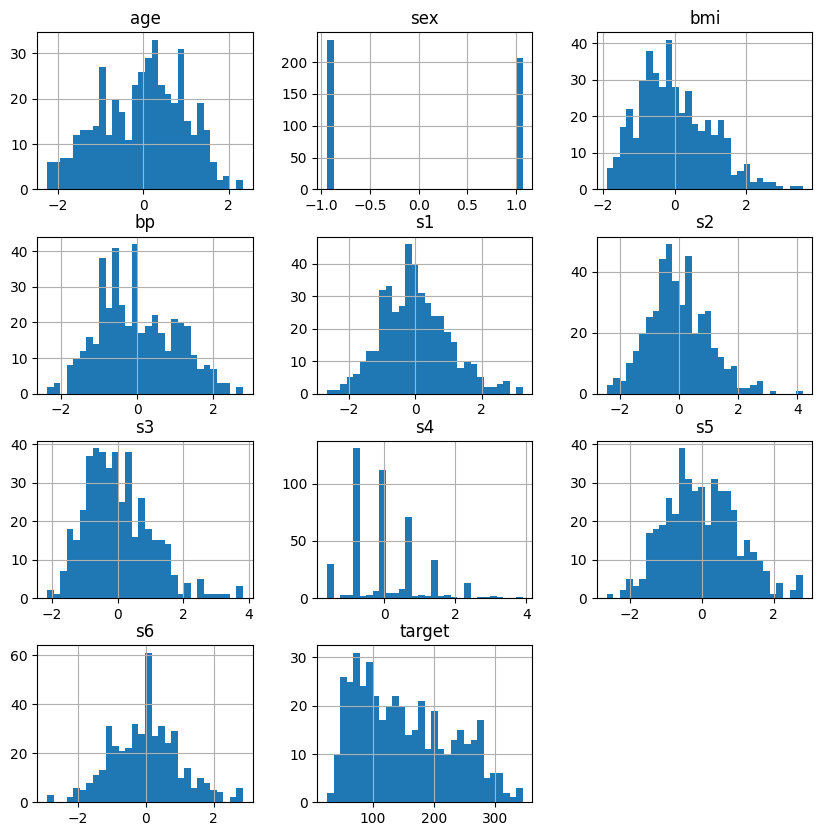

In [14]:
df_standardized.hist(figsize=(10,10),bins=30)

<Axes: >

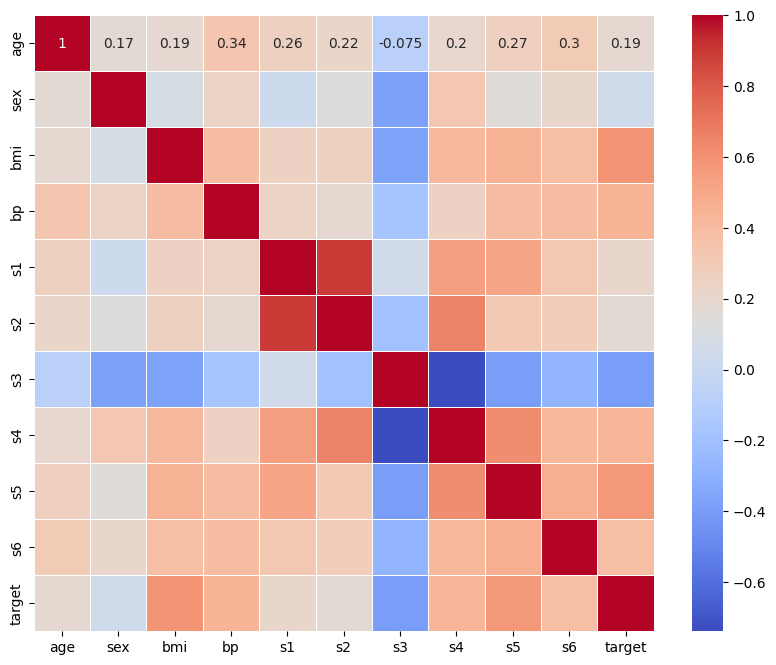

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df_standardized.corr(),annot=True,cmap='coolwarm',linewidths=0.5)

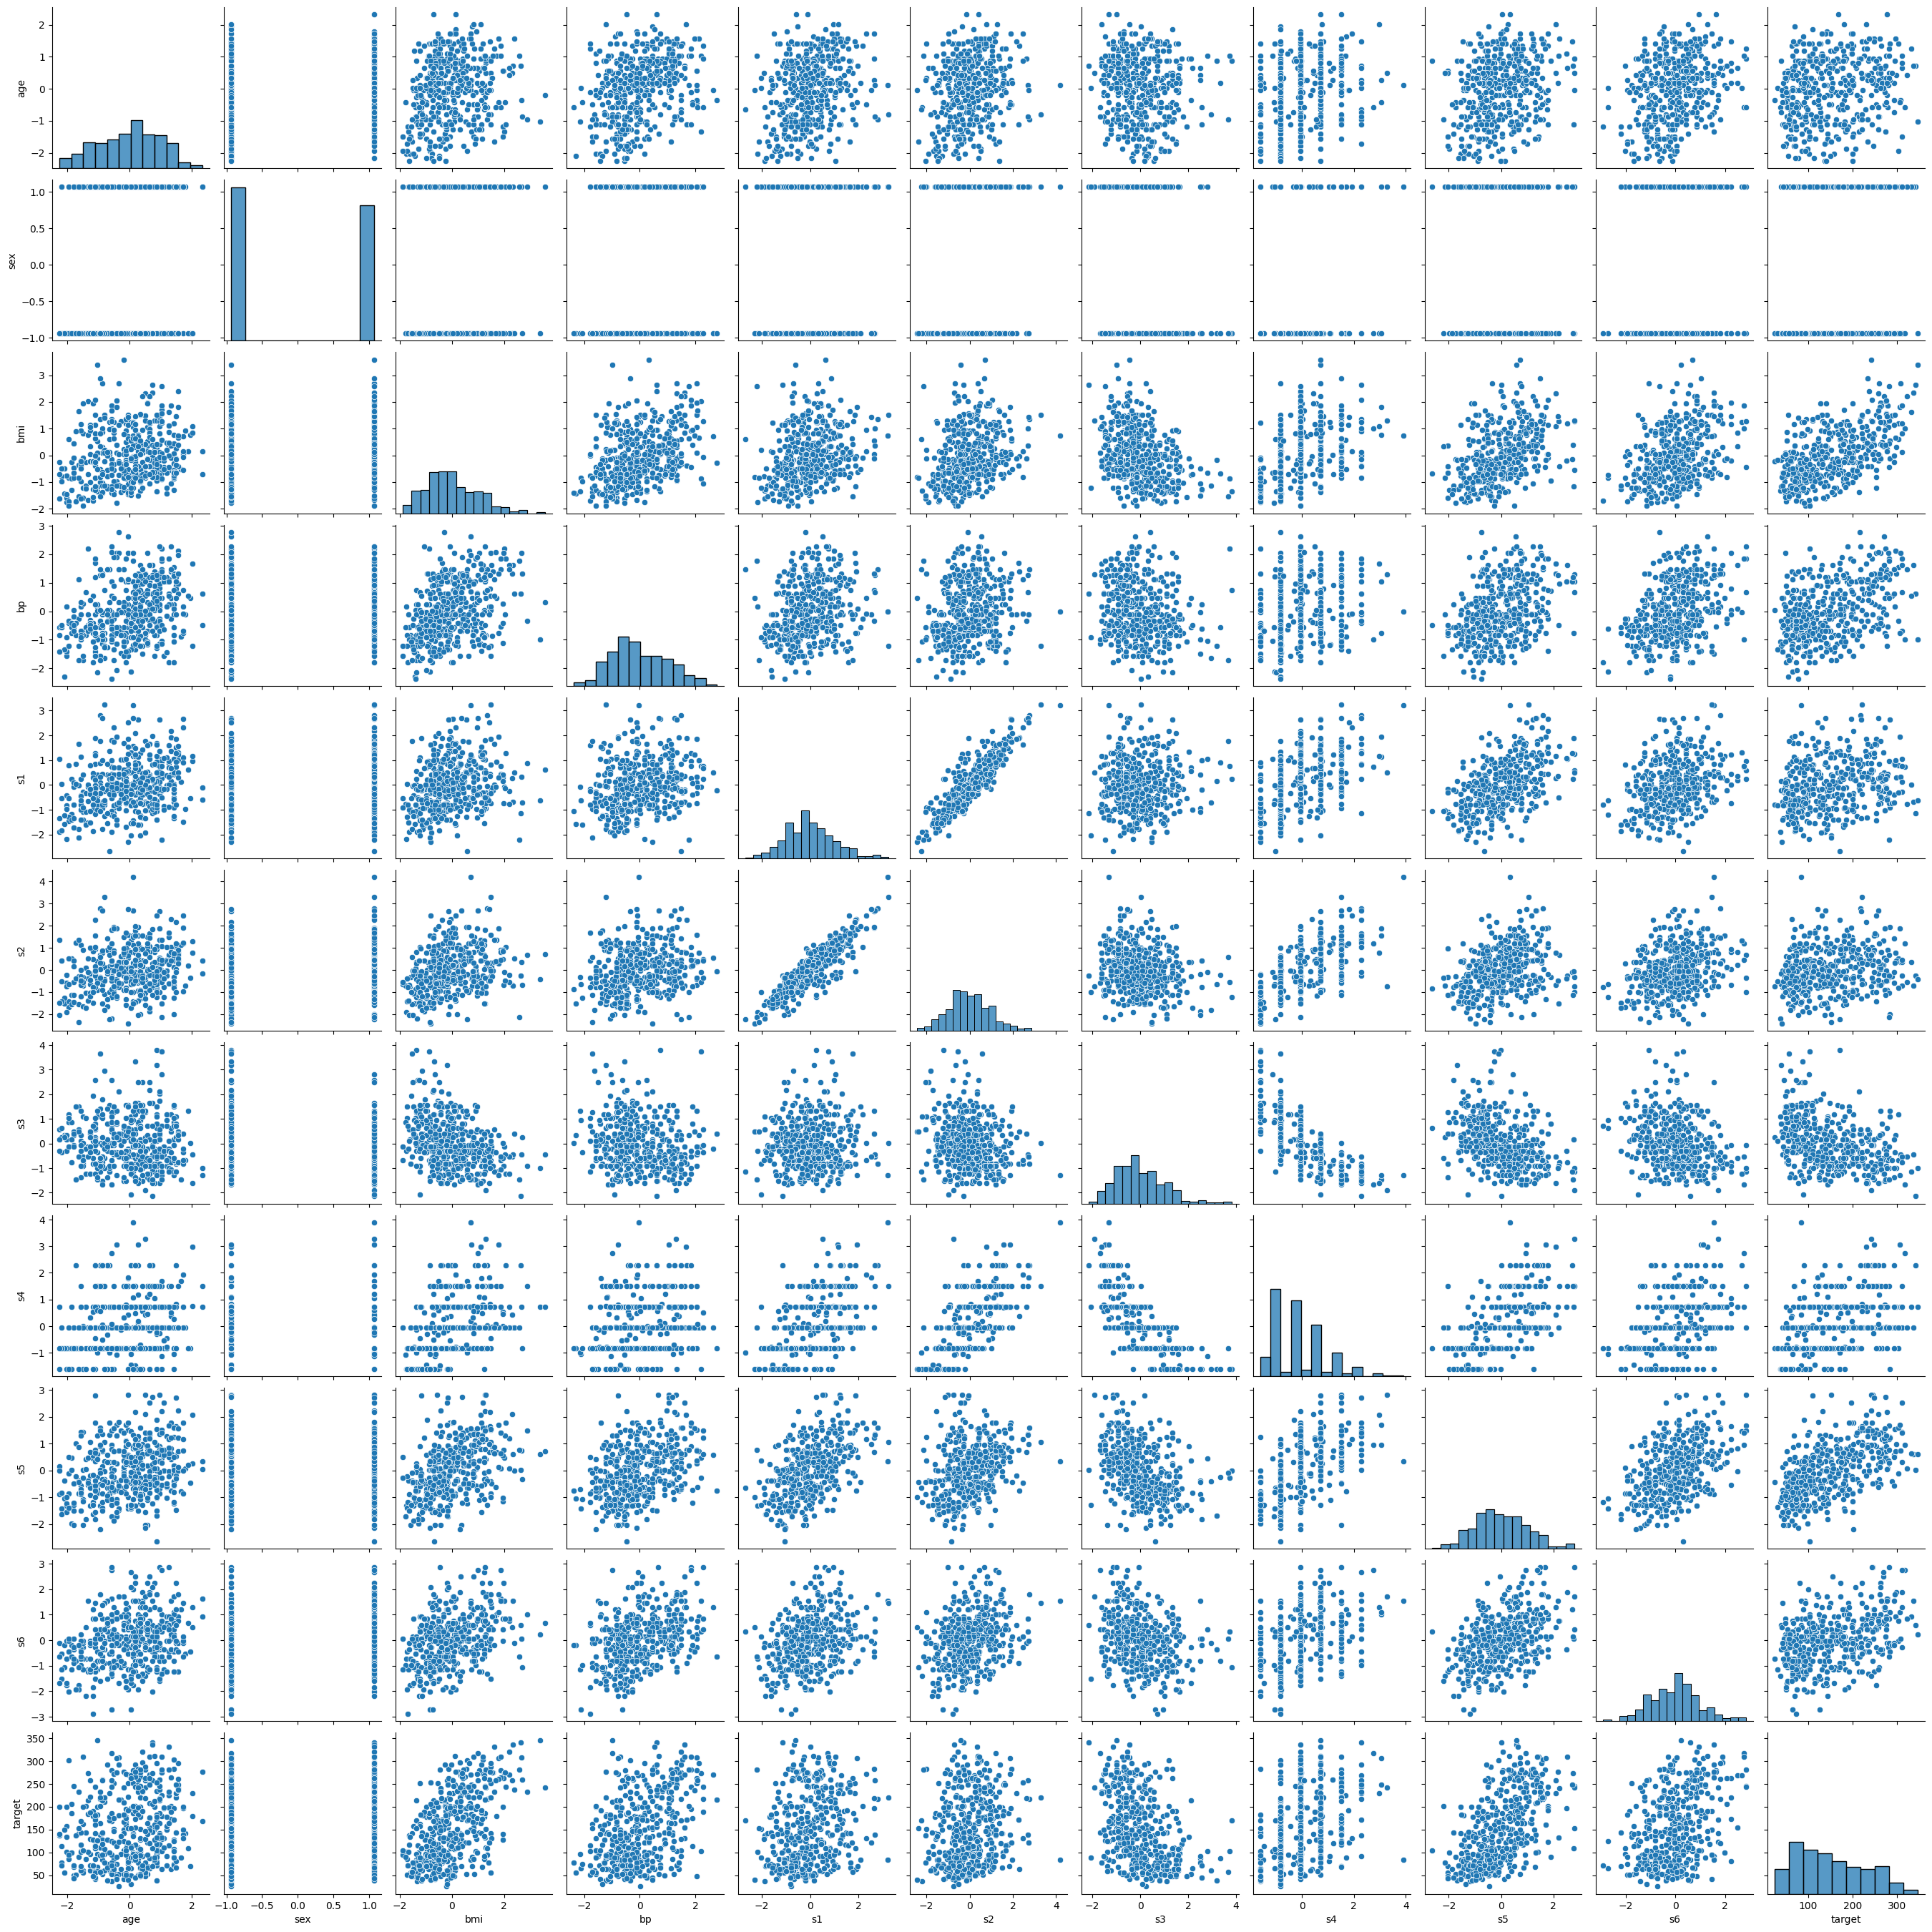

In [16]:
sns.pairplot(df_standardized)

age          Axes(0.125,0.712609;0.227941x0.167391)
sex       Axes(0.398529,0.712609;0.227941x0.167391)
bmi       Axes(0.672059,0.712609;0.227941x0.167391)
bp           Axes(0.125,0.511739;0.227941x0.167391)
s1        Axes(0.398529,0.511739;0.227941x0.167391)
s2        Axes(0.672059,0.511739;0.227941x0.167391)
s3            Axes(0.125,0.31087;0.227941x0.167391)
s4         Axes(0.398529,0.31087;0.227941x0.167391)
s5         Axes(0.672059,0.31087;0.227941x0.167391)
s6               Axes(0.125,0.11;0.227941x0.167391)
target        Axes(0.398529,0.11;0.227941x0.167391)
dtype: object

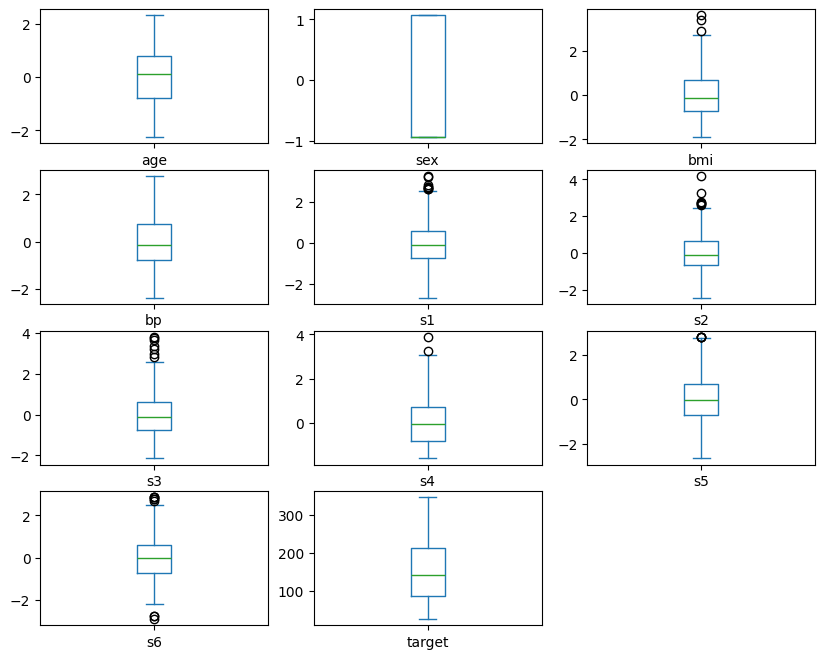

In [17]:
df_standardized.plot(kind='box',figsize=(10,8),layout=(4,3),sharex=False,subplots=True)

<Axes: xlabel='target', ylabel='Count'>

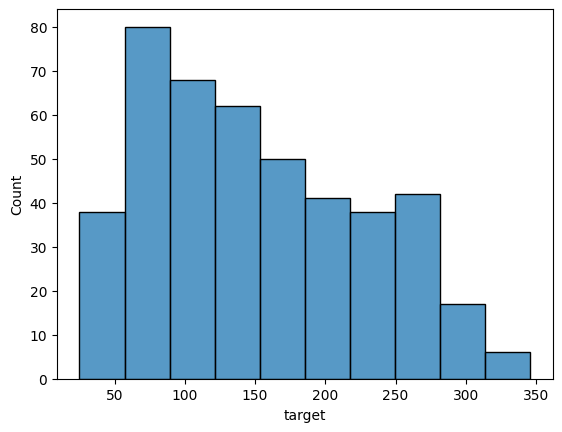

In [18]:
sns.histplot(df_standardized['target'],bins=10)

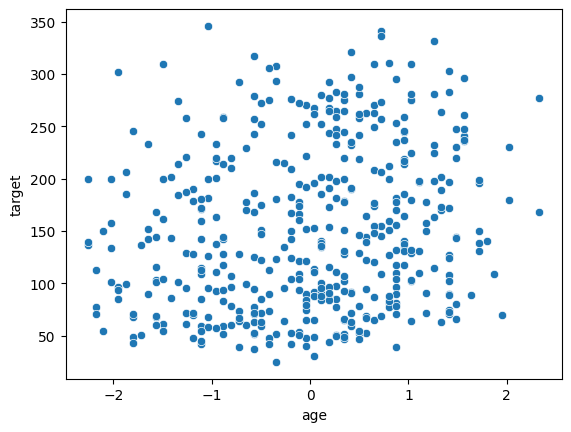

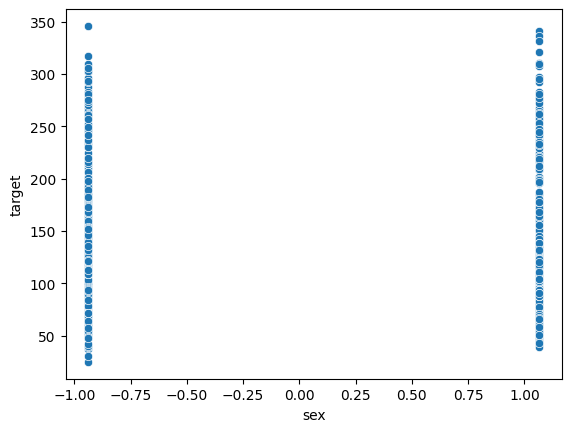

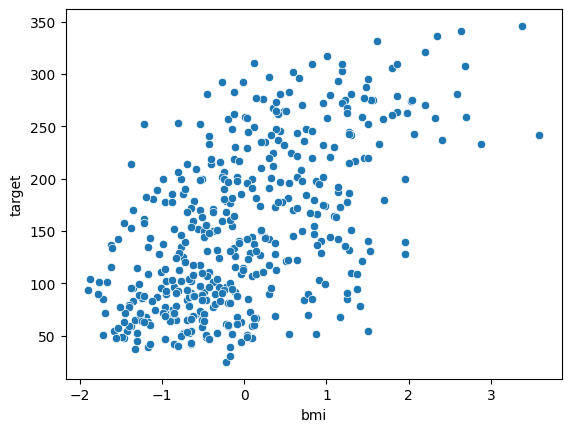

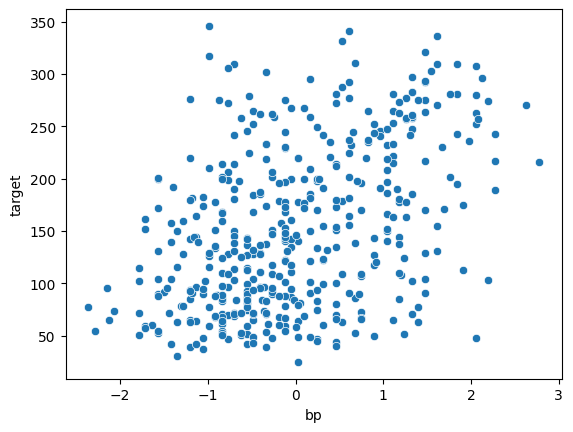

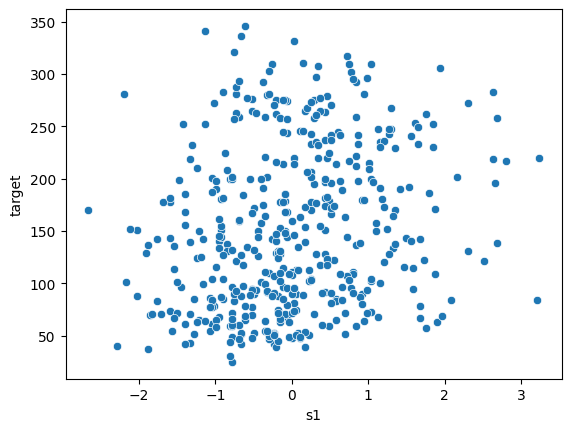

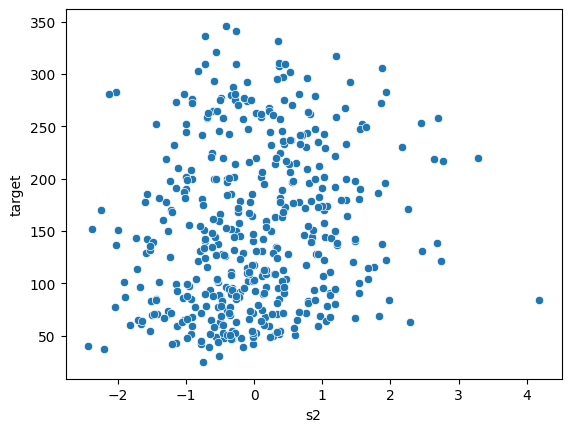

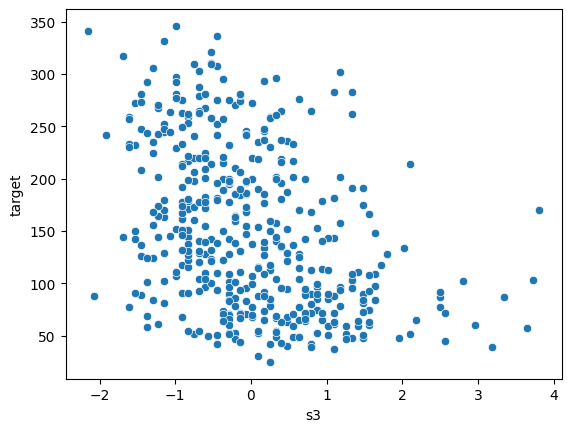

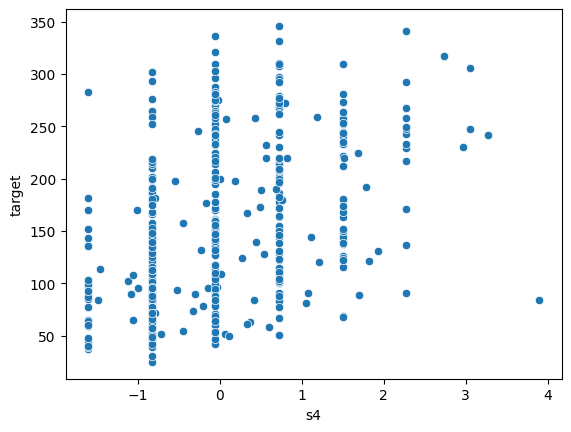

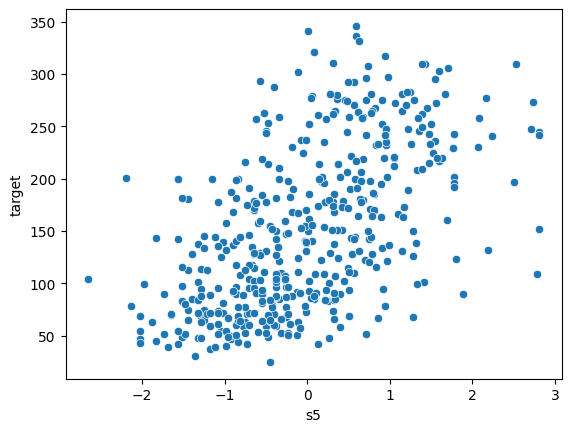

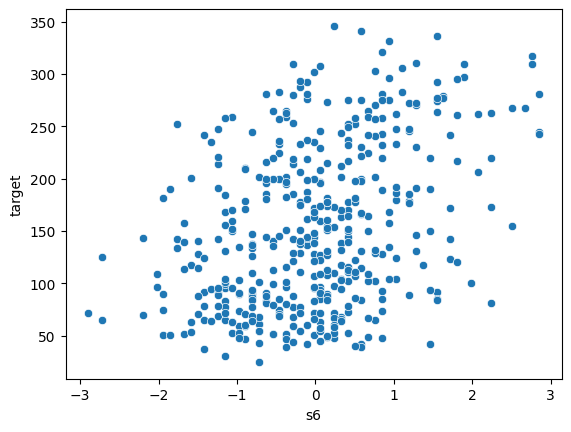

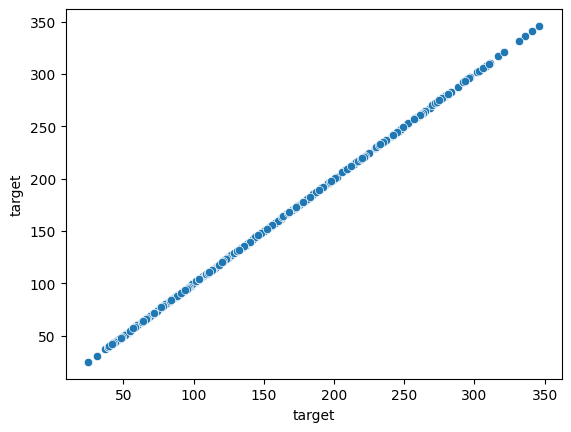

In [19]:
for col in df_standardized[:-1]:
    sns.scatterplot(x=df_standardized[col],y=df_standardized['target'])
    plt.show()

In [20]:
print(df.corr()['target'].sort_values(ascending=False))

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


In [21]:
x = df_standardized.drop(columns='target')
y = df_standardized['target']

#  Construction of an Artificial Neural Network (ANN) Model for Diabetes Prediction

In [22]:
ann_model = Sequential()
ann_model.add(Dense(64,input_dim=x.shape[1],activation='relu'))
ann_model.add(Dense(32,activation='relu'))
ann_model.add(Dense(1))

demonstrates the architecture of an Artificial Neural Network (ANN) designed to predict diabetes progression based on standardized features from the Diabetes dataset. The model consists of an input layer with 64 neurons, a hidden layer with 32 neurons, and an output layer with a single neuron for regression tasks. The ReLU activation function is applied to the hidden layers to introduce non-linearity, enhancing the model's capability to learn complex patterns in the data.

## Compiling the Artificial Neural Network (ANN) Model for Diabetes Prediction

In [23]:
ann_model.compile(optimizer=Adam(),loss='mse')

## Splitting the Standardized Dataset into Training and Testing Sets

In [60]:
x_train,x_test,y_train,y_test = train_test_split(df_standardized,y,test_size=0.2,random_state=42)

## Training the Artificial Neural Network Model

In [40]:
history = ann_model.fit(x_train_fixed,y_train,epochs = 100,batch_size=32,validation_split=0.2)

Epoch 1/100
9/9 [==============================] - 0s 10ms/step - loss: 2790.4353 - val_loss: 2828.9565
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 2784.2498 - val_loss: 2827.9175
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 2778.9988 - val_loss: 2828.3740
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 2779.5322 - val_loss: 2826.9216
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 2766.3882 - val_loss: 2821.3765
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 2763.4868 - val_loss: 2829.3494
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 2756.9500 - val_loss: 2827.3918
Epoch 8/100
9/9 [==============================] - 0s 7ms/step - loss: 2750.3035 - val_loss: 2823.5833
Epoch 9/100
9/9 [==============================] - 0s 6ms/step - loss: 2745.0732 - val_loss: 2816.8420
Epoch 10/100
9/9 [==============================] - 0s 5ms/step - loss: 

In [39]:
x_train_fixed = x_train.iloc[:,:-1]

(353, 11)
(353,)
(353, 10)


In [44]:
x_test_fixed = x_test.iloc[:,:-1]

## Evaluating the ANN Model Performance

In [52]:
test = ann_model.evaluate(x_test_fixed,y_test)

y_pred = ann_model.predict(x_test_fixed)

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print("test_toss:",test)
print("r2_score",r2)
print("mean_squared_error",mse)




3/3 [==============================] - 0s 3ms/step
test_toss: 2802.124267578125
r2_score 0.47111282361279583
mean_squared_error 2802.124518343874


Test Loss (MSE): 2802.1243
This value indicates the average squared difference between the predicted and actual target values on the test set. A lower MSE suggests better model performance, but in this case, the relatively high MSE indicates that the model has room for improvement in accurately predicting diabetes progression.

R² Score: 0.4711
This score reflects the proportion of variance in the target variable that the model can explain. An R² value closer to 1 indicates a better fit, while a value closer to 0 suggests that the model does not explain much of the variance. Here, an R² score of 0.4711 implies that the model explains approximately 47.1% of the variance in the diabetes progression data, indicating moderate predictive power.

Mean Squared Error (MSE): 2802.1245
Similar to the test loss, this MSE value quantifies the model's average prediction error. The closeness of this value to the test loss reinforces the model's performance evaluation, indicating consistency in its error metrics.

In [47]:
x_test_fixed.shape

(89, 10)

## Enhancing the ANN Model for Diabetes Prediction

In [67]:

model_improved = Sequential()
model_improved.add(Dense(128, input_dim=x_train_fixed.shape[1], activation='relu'))   
model_improved.add(Dense(64, activation='relu'))  
model_improved.add(Dense(32, activation='relu'))  
model_improved.add(Dense(1))  


model_improved.compile(optimizer='adam', loss='mse')


history_improved = model_improved.fit(x_train_fixed, y_train, epochs=100, batch_size=32, validation_split=0.2)


test_loss_improved = model_improved.evaluate(x_test_fixed, y_test)
y_pred_improved = model_improved.predict(x_test_fixed)


r2_improved = r2_score(y_test, y_pred_improved)
mse_improved = mean_squared_error(y_test, y_pred_improved)

print(f"Improved Model Test Loss (MSE): {test_loss_improved}")
print(f"Improved R² Score: {r2_improved}")
print(f"Improved Mean Squared Error: {mse_improved}")


Epoch 1/100
9/9 [==============================] - 1s 18ms/step - loss: 31433.9180 - val_loss: 22295.4512
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 31143.7344 - val_loss: 22009.9180
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 30666.4648 - val_loss: 21505.8691
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 29823.2520 - val_loss: 20614.7012
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 28271.6387 - val_loss: 19082.4824
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 25577.1113 - val_loss: 16677.6660
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 21327.8145 - val_loss: 13235.0215
Epoch 8/100
9/9 [==============================] - 0s 5ms/step - loss: 15826.6201 - val_loss: 9022.8271
Epoch 9/100
9/9 [==============================] - 0s 5ms/step - loss: 9870.1934 - val_loss: 5405.0078
Epoch 10/100
9/9 [==============================] - 0s 5m

Improved Model Test Loss (MSE):

Value: 2776.0710
This represents the mean squared error of the model when evaluated on the test dataset. A lower MSE indicates better predictive accuracy compared to previous iterations, suggesting the model is performing more effectively in minimizing the error between predicted and actual values.
Improved R² Score:

Value: 0.4760
The R² score indicates that approximately 47.6% of the variance in diabetes progression can be explained by the model. While this shows some improvement, there is still significant room for enhancing the model's explanatory power.
Improved Mean Squared Error:

Value: 2776.0711
This value corroborates the test loss, reinforcing the model's predictive performance. A decrease from the previous MSE suggests that adjustments made to the model architecture were beneficial.

In [70]:
print("test_toss:",test)
print("r2_score",r2)
print("mean_squared_error",mse)
print("\n")
print(f"Improved Model Test Loss (MSE): {test_loss_improved}")
print(f"Improved R² Score: {r2_improved}")
print(f"Improved Mean Squared Error: {mse_improved}")


test_toss: 2802.124267578125
r2_score 0.47111282361279583
mean_squared_error 2802.124518343874


Improved Model Test Loss (MSE): 2776.071044921875
Improved R² Score: 0.476030283004546
Improved Mean Squared Error: 2776.0710722692133


Before Improvement:

Test Loss (MSE): 2802.12
R² Score: 0.4711
MSE: 2802.12

After Improvement:

Test Loss (MSE): 2776.07
R² Score: 0.4760
MSE: 2776.07

Although the improvement is relatively small